# Minnesota BMSB Analysis: `Accuracy Assessment`
##### Contributors: *Luke Zaruba*, *Mattie Gisselbeck*
##### Last Updated: 2023-04-28

In this notebook, the accuracy and validity of the models is assessed.

In [1]:
# Import Packages
import os

import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
# Read in DataFrames
model_input_df = pd.read_csv("../data/model/cities.csv")
huff_simple_df = pd.read_csv("../data/model/results/final_huff.csv")
huff_decay_df = pd.read_csv("../data/model/results/final_huff_decay.csv")
gravity_df = pd.read_csv("../data/model/results/final_gravity.csv")

In [3]:
# Clean up Model Input DF
model_input_df = model_input_df[["cities_FEATURE_NA", "agg_observations_Point_Count"]].copy()

model_input_df.columns = ["City", "Observation Count"]

model_input_df.head()

,City,Observation Count
0,Bluffton,0
1,Sartell,0
2,Cambridge,1
3,Waseca,0
4,La Crescent,0


In [4]:
# Clean up Results
huff_simple_assessment_df = huff_simple_df[["City", "Incoming"]].copy()
huff_decay_assessment_df = huff_decay_df[["City", "Incoming"]].copy()
gravity_assessment_df = gravity_df[["City", "Incoming"]].copy()

# Example Output
gravity_assessment_df.head()

,City,Incoming
0,Bluffton,0
1,Sartell,9
2,Sartell,9
3,Cambridge,0
4,Waseca,5


## Plotting

In [5]:
# Join Results to Inputs
huff_simple_reg = model_input_df.merge(huff_simple_assessment_df, left_on="City", right_on="City")
huff_decay_reg = model_input_df.merge(huff_decay_assessment_df, left_on="City", right_on="City")
gravity_reg = model_input_df.merge(gravity_assessment_df, left_on="City", right_on="City")

# Example Output of Joins
huff_decay_reg

,City,Observation Count,Incoming
0,Bluffton,0,0
1,Sartell,0,0
2,Sartell,0,0
3,Sartell,0,0
4,Sartell,0,0
...,...,...,...
1001,Plainview,0,0
1002,Albertville,0,19
1003,Storden,0,0
1004,Rosemount,3,12


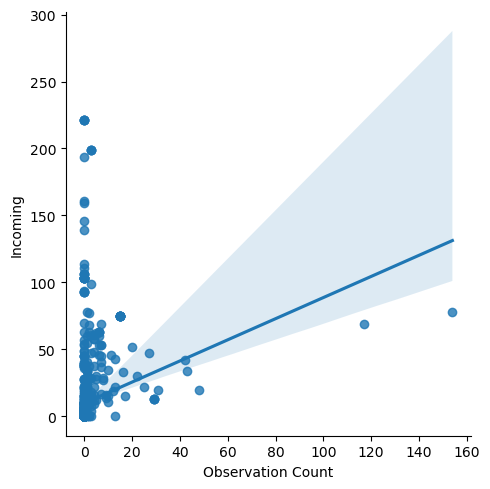

In [6]:
# Regression - Huff Simple
sns.lmplot(data=huff_simple_reg, x="Observation Count", y="Incoming");

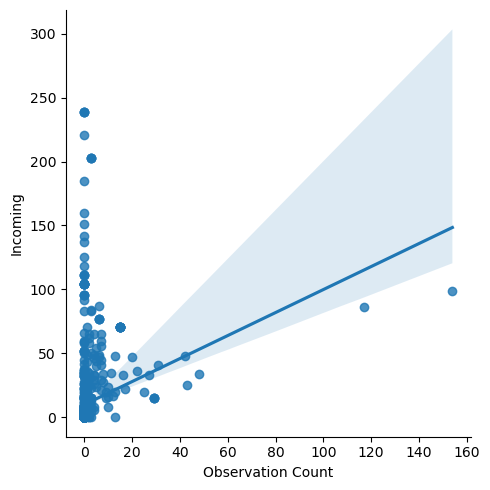

In [7]:
# Regression - Huff Decay
sns.lmplot(data=huff_decay_reg, x="Observation Count", y="Incoming");

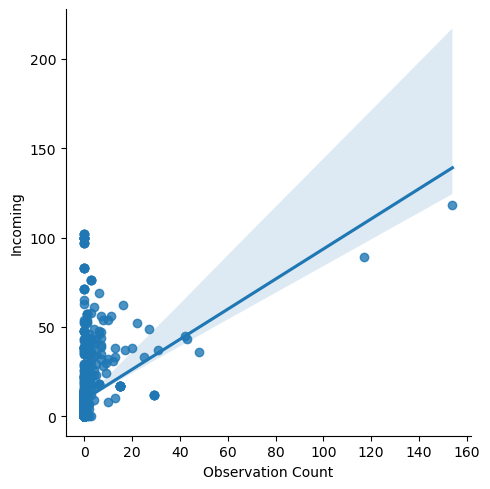

In [8]:
# Regression - Gravity
sns.lmplot(data=gravity_reg, x="Observation Count", y="Incoming");

## $R_{}^{2}$: Coefficient of determination

In [9]:
# Huff Simple
r2_score(huff_simple_reg["Observation Count"], huff_simple_reg["Incoming"])

-16.783797090421235

In [10]:
# Huff Decay
r2_score(huff_decay_reg["Observation Count"], huff_decay_reg["Incoming"])

-17.595876858510255

In [11]:
# Gravity
r2_score(gravity_reg["Observation Count"], gravity_reg["Incoming"])

-7.013110020929707

## Correlation - Huff Simple

In [12]:
# Pearson's r
pearson_corr = huff_simple_reg.corr(method="pearson", numeric_only=True).iloc[0, 1]
print("Pearson's r':", pearson_corr)

# Spearman correlation coefficient
spearman_corr = huff_simple_reg.corr(method="spearman", numeric_only=True).iloc[0, 1]
print("Spearman correlation coefficient:", spearman_corr)

# Kendall's Tau
kendall_tau = huff_simple_reg.corr(method="kendall", numeric_only=True).iloc[0, 1]
print("Kendall's Tau:", kendall_tau)

Pearson's r': 0.19341474331577335
Spearman correlation coefficient: 0.5212296209963665
Kendall's Tau: 0.4657155848351818


## Correlation - Huff Decay

In [13]:
# Pearson's r
pearson_corr = huff_decay_reg.corr(method="pearson", numeric_only=True).iloc[0, 1]
print("Pearson's r':", pearson_corr)

# Spearman correlation coefficient
spearman_corr = huff_decay_reg.corr(method="spearman", numeric_only=True).iloc[0, 1]
print("Spearman correlation coefficient:", spearman_corr)

# Kendall's Tau
kendall_tau = huff_decay_reg.corr(method="kendall", numeric_only=True).iloc[0, 1]
print("Kendall's Tau:", kendall_tau)

Pearson's r': 0.2145249699610488
Spearman correlation coefficient: 0.5299143828616187
Kendall's Tau: 0.47540321567698396


## Correlation - Gravity

In [14]:
# Pearson's r
pearson_corr = gravity_reg.corr(method="pearson", numeric_only=True).iloc[0, 1]
print("Pearson's r':", pearson_corr)

# Spearman correlation coefficient
spearman_corr = gravity_reg.corr(method="spearman", numeric_only=True).iloc[0, 1]
print("Spearman correlation coefficient:", spearman_corr)

# Kendall's Tau
kendall_tau = gravity_reg.corr(method="kendall", numeric_only=True).iloc[0, 1]
print("Kendall's Tau:", kendall_tau)

Pearson's r': 0.3160347597377355
Spearman correlation coefficient: 0.46523363670099305
Kendall's Tau: 0.38825396045341715


## Interpretation

In the metrics shown above, $R_{}^{2}$: clearly performs worse than Pearson's *r*. However, by keeping in mind what they were designed to do and what exactly we are trying to measure, this makes sense. This assessment is comparing simulated presence counts compared to actual presence counts, meaning that the magnitudes should not line up because we are oversimulating observations to get a more general view of how presence exists across space, comparatively. Pearson's *r* naturally provides a better fit for this type of problem, because it is designed to measure correlation rather than actual error/fit. The whole point of the $R_{}^{2}$ metric is to show the fit of the model, but this will not perform well in this specific context. In addition to using Pearson's *r*, two other correlation metrics are used, namely the Spearman correlation coefficient and Kendall's Tau, which both can take non-linear relationships into account. Together, these three measures of correlation can help show us just how reasonable and valid the model is.

The results are summarized below, with the best performing model for each metric highlighted in green.

|     **Model**   |   **Pearson**   |   **Spearman**   |   **Kendall**   |
| :-: | :-: | :-: | :-: |
| Huff Simple ($\alpha$ = 1) | 0.1934 | 0.5212 | 0.4657 |
| Huff Decay ($\alpha$ = 2) | 0.2145 | <span style="color:green">0.5299</span>  | <span style="color:green">0.4754</span> |
| Gravity | <span style="color:green">0.3160</span> | 0.4652 | 0.3883 |

Based on these results, it appears that the Huff model using a distance decay parameter ($\alpha$) of 2 is the best performing all around, with it being the best for two of the three metrics. However, the Gravity model performs much better than the other models, when only linear relationships are taken into account (i.e., through Pearson's *r*). Ultimately determining the "best" model comes down to whether we think the relationship between the variables should be linear or not. It is difficult, because the variables are showing two very different things. Just because there isn't currently a BMSB presence in a city, does not mean that there could not easily be, which is exaectly what the simulations are trying to model and capture. With that being said though, we believe that both the Huff Decay and Gravity models can be used to adequately model the phenomena and inform decision making regarding BMSB hazards, spread, and mitigation efforts.